NAME- SOUMYADEEP CHAKRABORTY

INTERNSHIP ID- INTERNSHIP_17546440516895be537820f

APPLY ID- APPLY_175569487368a5c719d1c19

**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

**LOAD THE DATASET**


**DATA STATISTICS**

In [3]:
# Load the Excel Dataset
df = pd.read_excel("/content/1730285881-Airbnb_Open_Data.xlsx")



In [4]:
# Basic Information About the Dataset
print("Shape of the dataset:", df.shape)   # number of rows and columns
print("\nColumn names:\n", df.columns.tolist())


Shape of the dataset: (102599, 26)

Column names:
 ['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']


In [5]:
print("\n--- Dataset Info ---")
df.info()   # data types, non-null counts



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    10

In [6]:
# Check for Missing Values
print("\n--- Missing Values per Column ---")
print(df.isnull().sum())



--- Missing Values per Column ---
id                                     0
NAME                                 270
host id                                0
host_identity_verified               289
host name                            408
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365      

In [7]:
# Summary Statistics for Numeric Columns
print("\n--- Summary Statistics (Numeric) ---")
print(df.describe())



--- Summary Statistics (Numeric) ---
                 id       host id            lat           long  \
count  1.025990e+05  1.025990e+05  102591.000000  102591.000000   
mean   2.914623e+07  4.925411e+10      40.728094     -73.949644   
min    1.001254e+06  1.236005e+08      40.499790     -74.249840   
25%    1.508581e+07  2.458333e+10      40.688740     -73.982580   
50%    2.913660e+07  4.911774e+10      40.722290     -73.954440   
75%    4.320120e+07  7.399650e+10      40.762760     -73.932350   
max    5.736742e+07  9.876313e+10      40.916970     -73.705220   
std    1.625751e+07  2.853900e+10       0.055857       0.049521   

       instant_bookable  Construction year          price    service fee  \
count     102494.000000      102385.000000  102352.000000  102326.000000   
mean           0.497785        2012.487464     625.293536     125.026924   
min            0.000000        2003.000000      50.000000      10.000000   
25%            0.000000        2007.000000     340.000

In [8]:
# Summary Statistics for Categorical Columns
print("\n--- Summary Statistics (Categorical) ---")
print(df.describe(include=['object']))


--- Summary Statistics (Categorical) ---
                       NAME host_identity_verified host name  \
count                102329                 102310    102191   
unique                61280                      2     13189   
top     Home away from home            unconfirmed   Michael   
freq                     33                  51200       881   

       neighbourhood group       neighbourhood        country country code  \
count               102570              102583         102067       102468   
unique                   7                 224              1            1   
top              Manhattan  Bedford-Stuyvesant  United States           US   
freq                 43792                7937         102067       102468   

       cancellation_policy        room type  \
count               102523           102599   
unique                   3                4   
top               moderate  Entire home/apt   
freq                 34343            53701   

          

**DATA CLEANING AND PRE-PROCESSING**

In [13]:
# Data Cleaning and Preprocessing


# Remove Duplicate Rows
df.drop_duplicates(inplace=True)

# Standardize Column Names (lowercase and replace spaces with underscores)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Clean Text Columns (remove extra spaces, convert to lowercase)
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

# Clean Price and Service Fee Columns
# Remove $ and commas, convert to float
for col in ['price', 'service_fee']:
    if col in df.columns:
        # Convert the column to string type before using .str accessor
        df[col] = df[col].astype(str).str.replace(r'[\$,]', '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert Boolean Columns (instant_bookable)
# Check if 'instant_bookable' is in columns before attempting to map
if 'instant_bookable' in df.columns:
    # Convert to string first to handle potential non-string types before mapping
    df['instant_bookable'] = df['instant_bookable'].astype(str).map({'true': True, 'false': False})


# Convert Date Columns (last_review)
if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Handle Missing Values
# Fill numeric columns with median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode (most frequent value)
for col in cat_cols:
    # Ensure the column is treated as object/string before filling NaN with mode
    if df[col].dtype != 'object':
      df[col] = df[col].astype(str)
    # Check if mode() returns a non-empty Series
    mode_val = df[col].mode()
    if not mode_val.empty:
        df[col] = df[col].fillna(mode_val[0])
    else:
        # Handle case where all values are NaN (e.g., fill with a placeholder or drop)
        # For now, let's fill with a placeholder 'unknown'
        df[col] = df[col].fillna('unknown')


# Remove Invalid Latitude/Longitude (if present)
if 'lat' in df.columns and 'long' in df.columns:
    df = df[(df['lat'].between(-90, 90)) & (df['long'].between(-180, 180))]

# Handle Outliers (Cap extreme values at 99th percentile)
for col in ['price', 'service_fee']:
    if col in df.columns and df[col].dtype in [np.number]:
        upper_limit = df[col].quantile(0.99)
        df = df[df[col] <= upper_limit]

# Final Check — Confirm Cleaning Results
print("Data Cleaning Completed!")
print("Shape after cleaning:", df.shape)
print("\nRemaining missing values:\n", df.isnull().sum())
print("\nData Types after cleaning:")
print(df.dtypes)

Data Cleaning Completed!
Shape after cleaning: (96478, 26)

Remaining missing values:
 id                                    0
name                                  0
host_id                               0
host_identity_verified                0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
lat                                   0
long                                  0
country                               0
country_code                          0
instant_bookable                      0
cancellation_policy                   0
room_type                             0
construction_year                     0
price                                 0
service_fee                           0
minimum_nights                        0
number_of_reviews                     0
last_review                       15021
reviews_per_month                     0
review_rate_number                    0
calculated_host_listings_count   

/tmp/ipython-input-1591587186.py:60: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if col in df.columns and df[col].dtype in [np.number]:
/tmp/ipython-input-1591587186.py:60: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if col in df.columns and df[col].dtype in [np.number]:


**EXPLORATORY DATA ANALYSIS**

In [15]:
# Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid", palette="Set2")

# Basic Overview
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())

print("\nNumeric Summary:")
print(df.describe())

print("\nCategorical Summary:")
print(df.describe(include=['object']))



Dataset Shape: (96478, 26)

Column Names:
 ['id', 'name', 'host_id', 'host_identity_verified', 'host_name', 'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country', 'country_code', 'instant_bookable', 'cancellation_policy', 'room_type', 'construction_year', 'price', 'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count', 'availability_365', 'house_rules', 'license']

Numeric Summary:
                 id       host_id           lat          long  \
count  9.647800e+04  9.647800e+04  96478.000000  96478.000000   
mean   2.917214e+07  4.929489e+10     40.728118    -73.949725   
min    1.001254e+06  1.236005e+08     40.499790    -74.249840   
25%    1.506082e+07  2.464273e+10     40.688740    -73.982590   
50%    2.916781e+07  4.917185e+10     40.722280    -73.954450   
75%    4.327314e+07  7.402645e+10     40.762820    -73.932530   
max    5.736742e+07  9.876313e+10     40.916970    -73.7052

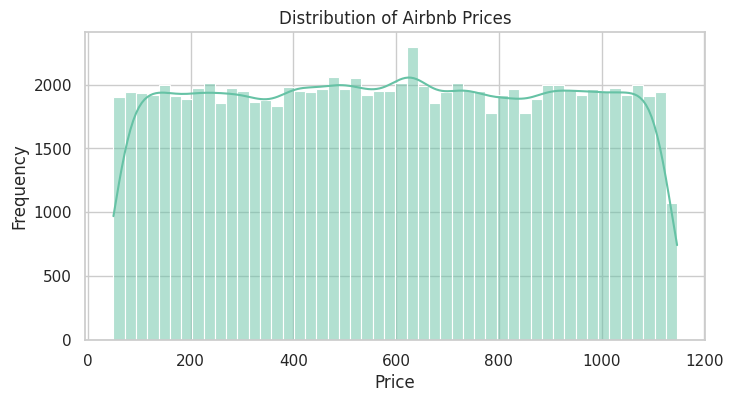

In [16]:
# Price Distribution
if 'price' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['price'], bins=50, kde=True)
    plt.title("Distribution of Airbnb Prices")
    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.show()

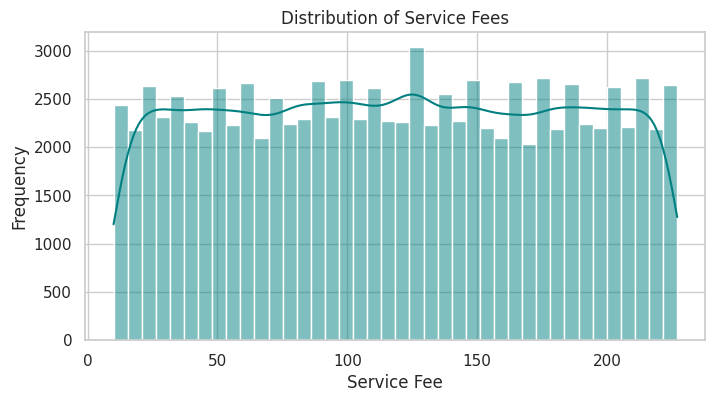

In [17]:
# Service Fee Distribution
if 'service_fee' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['service_fee'], bins=40, kde=True, color='teal')
    plt.title("Distribution of Service Fees")
    plt.xlabel("Service Fee")
    plt.ylabel("Frequency")
    plt.show()

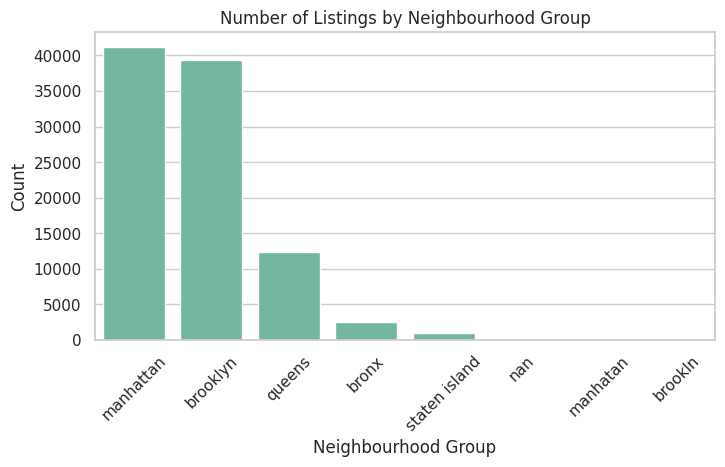

In [18]:
# Listings per Neighbourhood Group
if 'neighbourhood_group' in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x='neighbourhood_group', data=df, order=df['neighbourhood_group'].value_counts().index)
    plt.title("Number of Listings by Neighbourhood Group")
    plt.xlabel("Neighbourhood Group")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

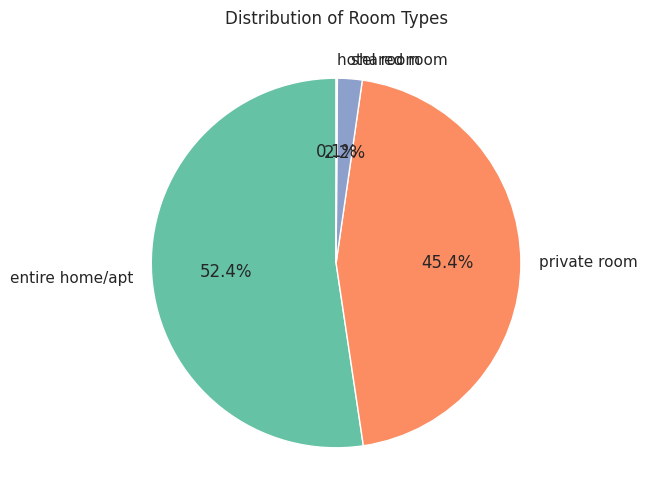

In [21]:
# Room Type Distribution
if 'room_type' in df.columns:
    plt.figure(figsize=(10,6))
    df['room_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title("Distribution of Room Types")
    plt.ylabel("")
    plt.show()

/tmp/ipython-input-3579408856.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='room_type', y='price', data=df, estimator=np.mean, ci=None)


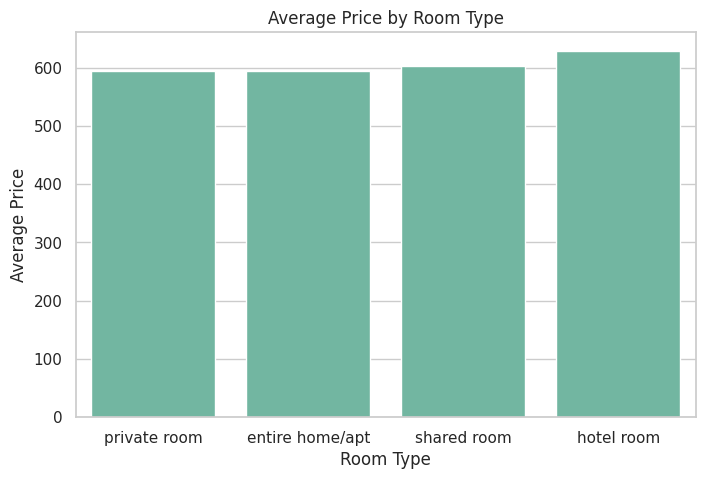

In [22]:
# Average Price by Room Type
if 'room_type' in df.columns and 'price' in df.columns:
    plt.figure(figsize=(8,5))
    sns.barplot(x='room_type', y='price', data=df, estimator=np.mean, ci=None)
    plt.title("Average Price by Room Type")
    plt.xlabel("Room Type")
    plt.ylabel("Average Price")
    plt.show()

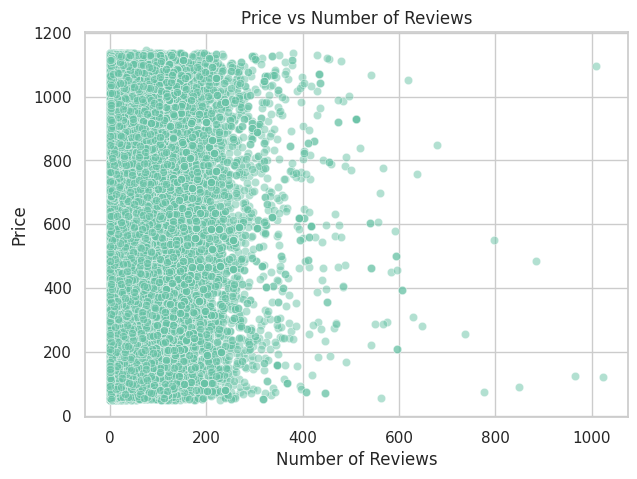

In [23]:
# Price vs Number of Reviews
if {'price', 'number_of_reviews'}.issubset(df.columns):
    plt.figure(figsize=(7,5))
    sns.scatterplot(x='number_of_reviews', y='price', data=df, alpha=0.5)
    plt.title("Price vs Number of Reviews")
    plt.xlabel("Number of Reviews")
    plt.ylabel("Price")
    plt.show()

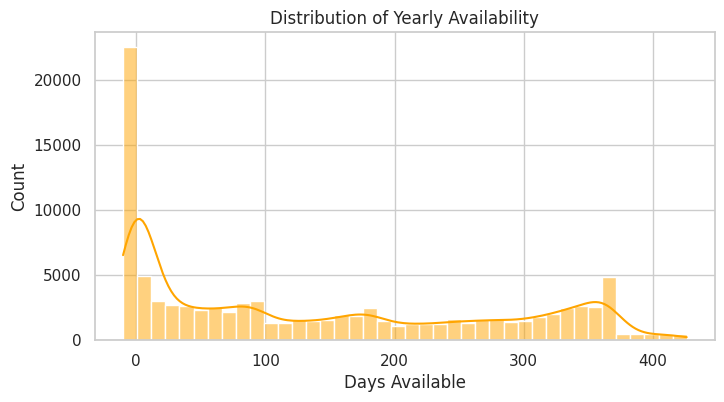

In [24]:
# Availability Distribution
if 'availability_365' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['availability_365'], bins=40, kde=True, color='orange')
    plt.title("Distribution of Yearly Availability")
    plt.xlabel("Days Available")
    plt.ylabel("Count")
    plt.show()

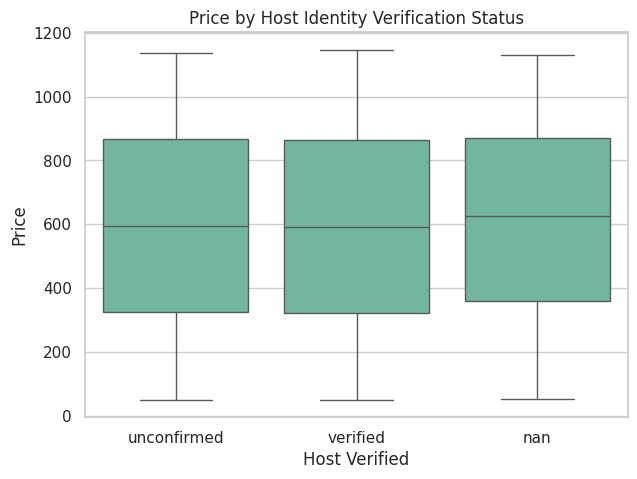

In [25]:
# Host Identity Verification vs Price
if 'host_identity_verified' in df.columns and 'price' in df.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(x='host_identity_verified', y='price', data=df)
    plt.title("Price by Host Identity Verification Status")
    plt.xlabel("Host Verified")
    plt.ylabel("Price")
    plt.show()

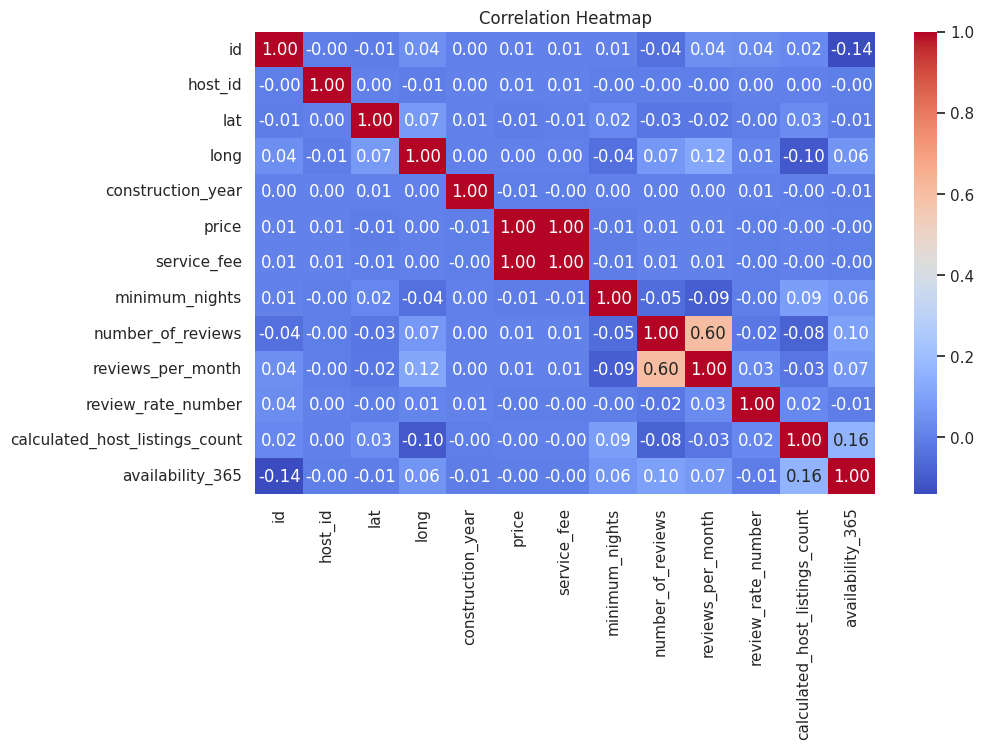

In [26]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**10 ANALYTICAL QUESTIONS FOR INSIGHTS**

1. What is the average price per neighbourhood group?

Average price by neighbourhood group:
 neighbourhood_group
nan              657.206897
bronx            600.392593
staten island    599.994499
queens           595.583965
brooklyn         594.868441
manhattan        592.080167
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64


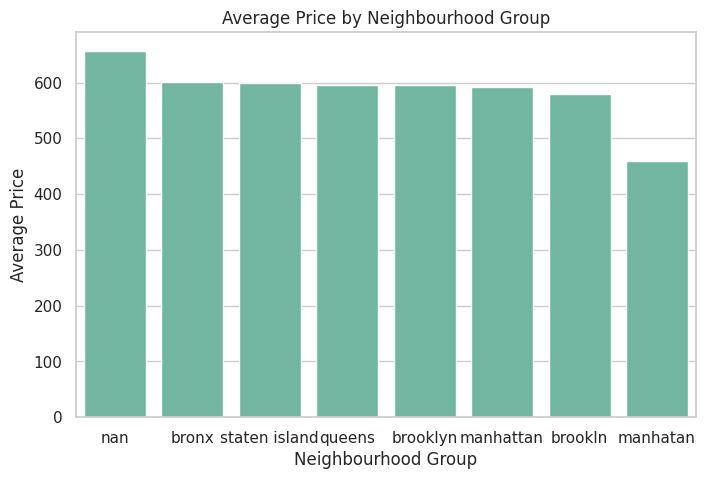

In [29]:
if 'neighbourhood_group' in df.columns and 'price' in df.columns:
    avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
    print("Average price by neighbourhood group:\n", avg_price)

    plt.figure(figsize=(8,5))
    sns.barplot(x=avg_price.index, y=avg_price.values)
    plt.title("Average Price by Neighbourhood Group")
    plt.xlabel("Neighbourhood Group")
    plt.ylabel("Average Price")
    plt.show()


**Insight**: Certain neighbourhood groups are significantly pricier,
likely due to location and popularity.

2. Which hosts have the most listings?

Top 10 hosts by number of listings:
 host_id
93578954226    1
80014485718    1
52335172823    1
78829239556    1
85098326012    1
92037596077    1
45498551794    1
61300605564    1
90821839709    1
79384379533    1
Name: count, dtype: int64


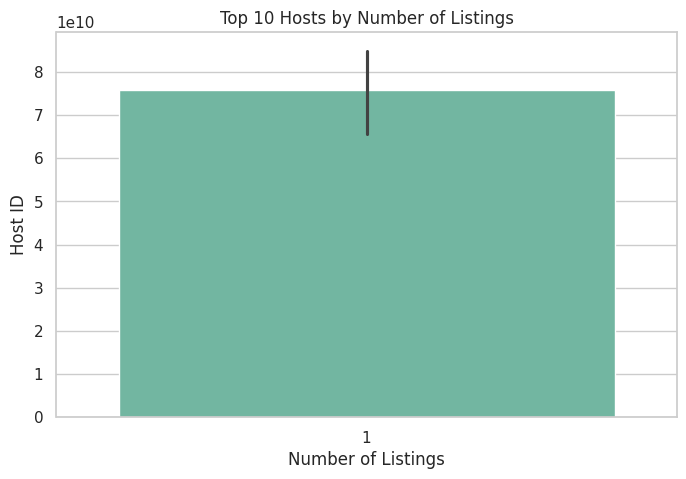

In [30]:
if 'host_id' in df.columns:
    top_hosts = df['host_id'].value_counts().head(10)
    print("Top 10 hosts by number of listings:\n", top_hosts)

    plt.figure(figsize=(8,5))
    sns.barplot(x=top_hosts.values, y=top_hosts.index)
    plt.title("Top 10 Hosts by Number of Listings")
    plt.xlabel("Number of Listings")
    plt.ylabel("Host ID")
    plt.show()

**Insight**: A few hosts manage multiple listings, indicating professional hosting or property management.

3. Which neighbourhoods have the highest average review scores?

Top 10 highest-rated neighbourhoods:
 neighbourhood
glen oaks          4.500000
gerritsen beach    4.333333
co-op city         4.250000
neponsit           4.200000
huguenot           4.111111
woodrow            4.000000
silver lake        4.000000
eltingville        4.000000
todt hill          4.000000
west farms         4.000000
Name: review_rate_number, dtype: float64


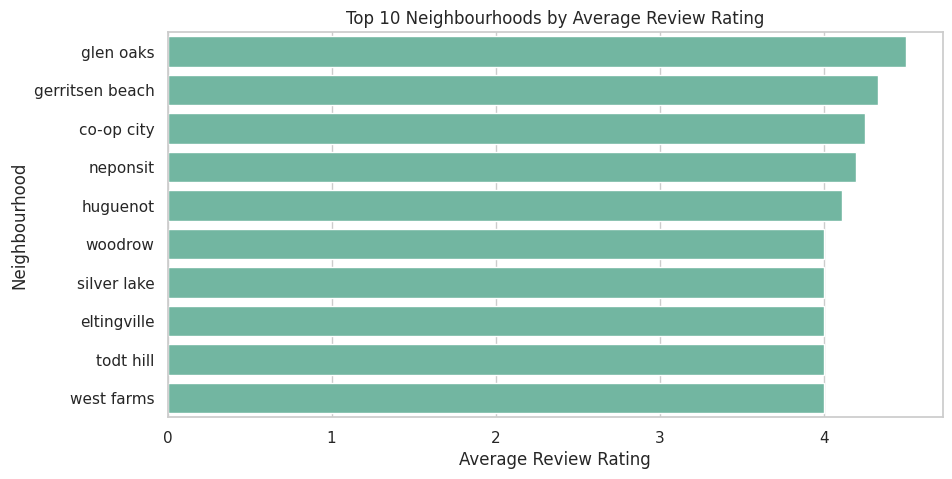

In [31]:
if 'neighbourhood' in df.columns and 'review_rate_number' in df.columns:
    top_rated = df.groupby('neighbourhood')['review_rate_number'].mean().sort_values(ascending=False).head(10)
    print("Top 10 highest-rated neighbourhoods:\n", top_rated)

    plt.figure(figsize=(10,5))
    sns.barplot(x=top_rated.values, y=top_rated.index)
    plt.title("Top 10 Neighbourhoods by Average Review Rating")
    plt.xlabel("Average Review Rating")
    plt.ylabel("Neighbourhood")
    plt.show()

**Insight**: These areas are well-rated by guests, likely offering good value and experience.

4. What is the relationship between price and number of reviews?

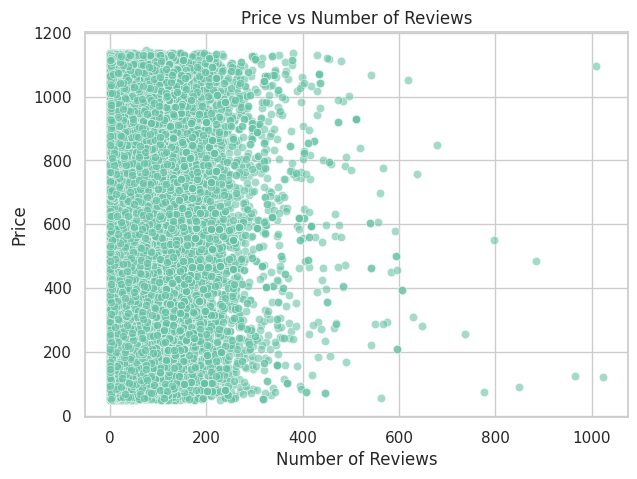

In [32]:
if {'price', 'number_of_reviews'}.issubset(df.columns):
    plt.figure(figsize=(7,5))
    sns.scatterplot(x='number_of_reviews', y='price', data=df, alpha=0.6)
    plt.title("Price vs Number of Reviews")
    plt.xlabel("Number of Reviews")
    plt.ylabel("Price")
    plt.show()

**Insight**: Listings with moderate prices often receive more reviews, while very high-priced ones get fewer.

5. Which room type is most popular and most expensive on average?

Room type analysis:
                  count        mean
room_type                         
hotel room         107  629.373832
shared room       2083  602.669707
entire home/apt  50514  593.906125
private room     43774  593.567232


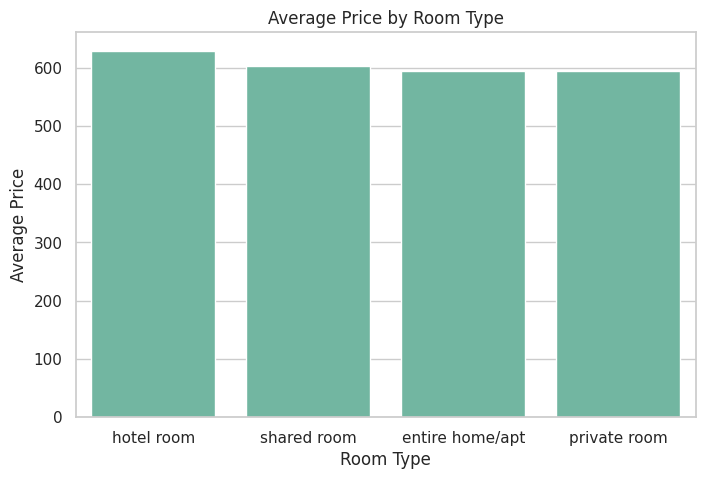

In [33]:
if 'room_type' in df.columns and 'price' in df.columns:
    room_analysis = df.groupby('room_type')['price'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)
    print("Room type analysis:\n", room_analysis)

    plt.figure(figsize=(8,5))
    sns.barplot(x=room_analysis.index, y=room_analysis['mean'])
    plt.title("Average Price by Room Type")
    plt.xlabel("Room Type")
    plt.ylabel("Average Price")
    plt.show()

**Insight**: Entire homes/apartments usually have the highest prices; shared rooms are the cheapest.

6. Which neighbourhoods have the highest number of listings?

Top 10 neighbourhoods by listing count:
 neighbourhood
bedford-stuyvesant    7468
williamsburg          7313
harlem                5121
bushwick              4670
hell's kitchen        3742
upper west side       3673
upper east side       3460
east village          3282
midtown               3198
crown heights         3094
Name: count, dtype: int64


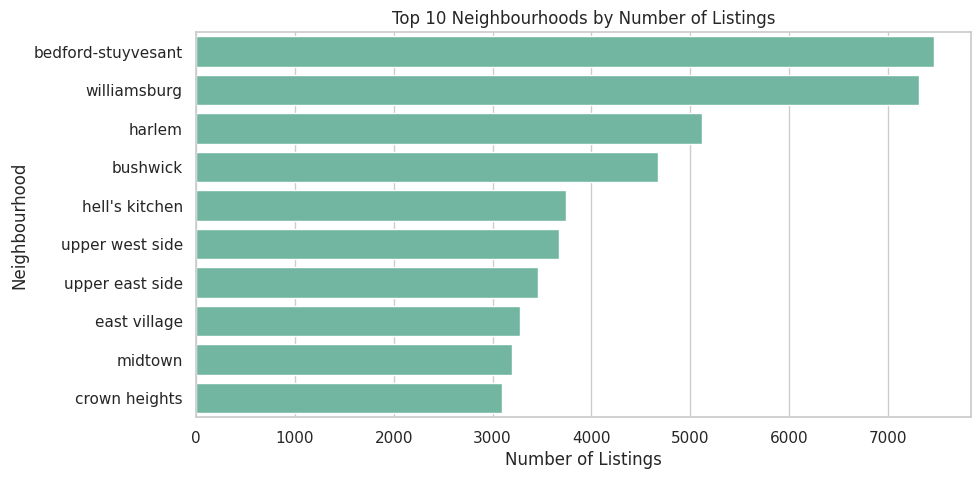

In [34]:
if 'neighbourhood' in df.columns:
    top_neigh = df['neighbourhood'].value_counts().head(10)
    print("Top 10 neighbourhoods by listing count:\n", top_neigh)

    plt.figure(figsize=(10,5))
    sns.barplot(x=top_neigh.values, y=top_neigh.index)
    plt.title("Top 10 Neighbourhoods by Number of Listings")
    plt.xlabel("Number of Listings")
    plt.ylabel("Neighbourhood")
    plt.show()

**Insight**: These neighbourhoods are the most popular or densely populated with Airbnb listings.

7. How does host verification affect pricing?

Average price by host verification status:
 host_identity_verified
nan            611.605839
unconfirmed    595.052449
verified       592.807991
Name: price, dtype: float64


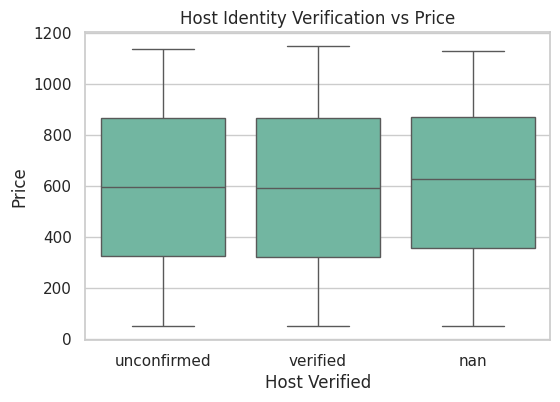

In [35]:
if 'host_identity_verified' in df.columns and 'price' in df.columns:
    avg_verified_price = df.groupby('host_identity_verified')['price'].mean()
    print("Average price by host verification status:\n", avg_verified_price)

    plt.figure(figsize=(6,4))
    sns.boxplot(x='host_identity_verified', y='price', data=df)
    plt.title("Host Identity Verification vs Price")
    plt.xlabel("Host Verified")
    plt.ylabel("Price")
    plt.show()

**Insight**: Verified hosts often charge higher prices due to increased guest trust.

8. Is there a relationship between availability and price?

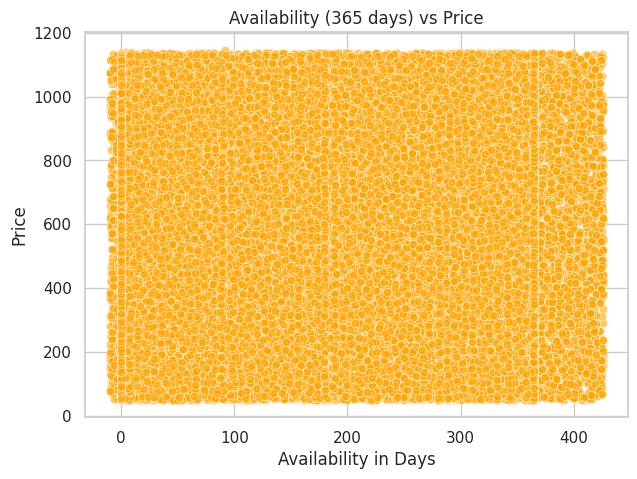

In [36]:
if 'availability_365' in df.columns and 'price' in df.columns:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x='availability_365', y='price', data=df, alpha=0.6, color='orange')
    plt.title("Availability (365 days) vs Price")
    plt.xlabel("Availability in Days")
    plt.ylabel("Price")
    plt.show()

**Insight**: No clear linear relationship; some high-priced listings may still have high availability.

9. What is the distribution of minimum nights required?

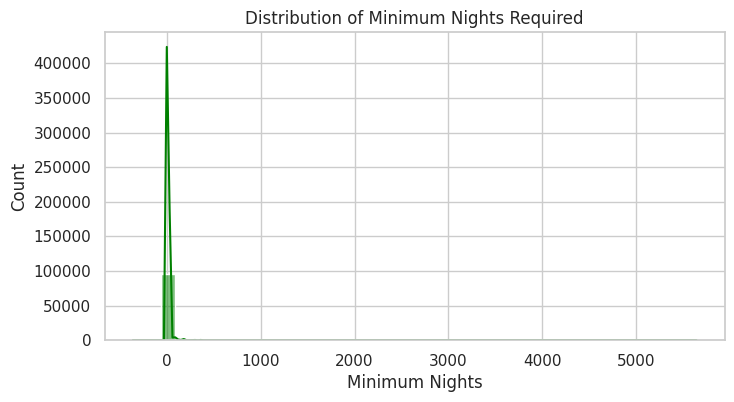

In [37]:
if 'minimum_nights' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['minimum_nights'], bins=40, kde=True, color='green')
    plt.title("Distribution of Minimum Nights Required")
    plt.xlabel("Minimum Nights")
    plt.ylabel("Count")
    plt.show()

**Insight**: Most listings have a short minimum stay, but a few require long stays (outliers exist).

10. What are the top 10 most expensive listings (name, price, neighbourhood)?

Top 10 most expensive listings:
                                                     name       neighbourhood  \
67823                sunny brooklyn brownstone apartment         sunset park   
66073                room in my apt. rego park queens ny           rego park   
65818   owner duplex in bedstuy townhouse with full yard  bedford-stuyvesant   
24914   artist's townhouse w/ garden, grill -near subway             gowanus   
96974   shared place by times square, theaters district.      hell's kitchen   
31250                        the godfather private  room  bedford-stuyvesant   
89787               a private room in manhattan, nyc !!!     lower east side   
40400  private midtown 2 br apt times sq theater dist...      hell's kitchen   
68465  private bedroom in the heart of chelsea (3fl/3...             chelsea   
16965   grand private apt with deck, one block to subway       east flatbush   

        price  
67823  1147.0  
66073  1139.0  
65818  1138.0  
24914  1137.0  
96974 

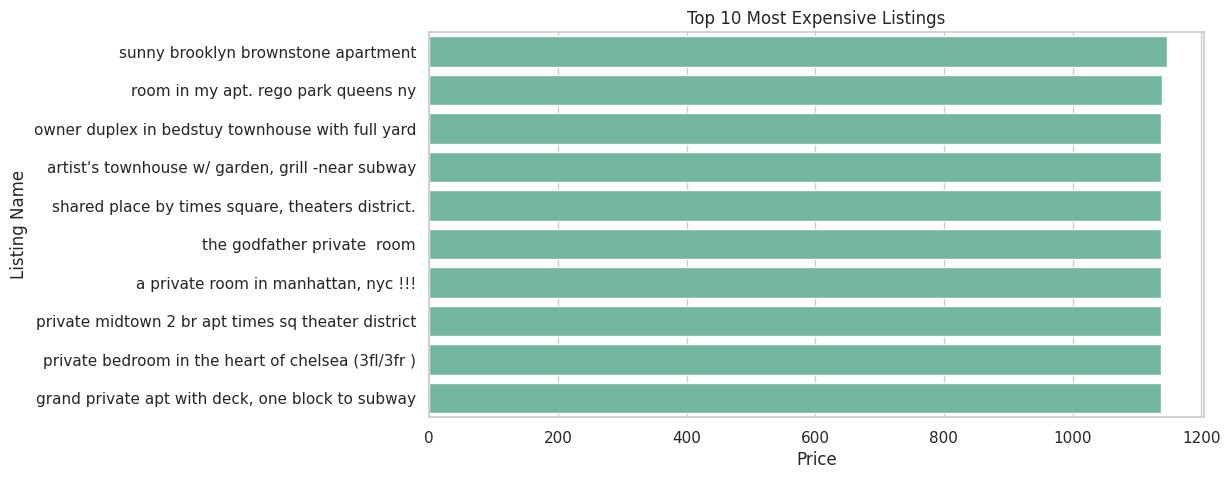

In [38]:
if {'name','neighbourhood','price'}.issubset(df.columns):
    expensive = df[['name','neighbourhood','price']].sort_values(by='price', ascending=False).head(10)
    print("Top 10 most expensive listings:\n", expensive)

    plt.figure(figsize=(10,5))
    sns.barplot(x='price', y='name', data=expensive)
    plt.title("Top 10 Most Expensive Listings")
    plt.xlabel("Price")
    plt.ylabel("Listing Name")
    plt.show()

**Insight**: These listings represent premium stays — luxury apartments or unique accommodations.